In [ ]:
# important lib. for NLP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

In [ ]:
# Read the data
text= pd.read_csv('/content/sample_data/Train (1).csv', encoding='unicode_escape')
text

,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÂÃÂªs Guide to iOS (and Andr...,9,2
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2
2,8212,Crazy that Apple is opening a temporary store ...,9,2
3,4422,The lesson from Google One Pass: In this digit...,9,2
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2
...,...,...,...,...
6359,2945,Thanks @mention for hosting this event #sxsw #...,9,2
6360,4528,"SXSW iPhone app is awesome, but iPad app crash...",7,1
6361,6526,RT @mention RT @mention Download 20+ free trac...,9,2
6362,2110,OH at Texas Social Media Awards: 'You don't ne...,9,2


In [ ]:
# check the Missing values
text.isna().sum()

Text_ID                0
Product_Description    0
Product_Type           0
Sentiment              0
dtype: int64

# Cleaning the data for NLP

In [ ]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)
text['Product_Description'] =text.Product_Description.apply(clean)

In [ ]:
# length # Find  count of wards , characters count in review clm
# used 'len' fuction for char_count= length 
text["characters count"]=text['Product_Description'].apply(len)

# Words count
text['Words_count']=text['Product_Description'].apply(lambda x:len(x.split()))


In [ ]:
#Calculate the polarity
from textblob import TextBlob

def  get_polarity(text):
  textblob=TextBlob(str(text)) 
  pol=textblob.sentiment.polarity
  return pol

text['polarity']=text['Product_Description'].apply(get_polarity)

In [ ]:
# Calculate subjectivity
def  get_subjectivity(text):
  textblob=TextBlob(str(text.encode("utf-8"))) 
  subj=textblob.sentiment.subjectivity
  return subj

text['subjectivity']=text['Product_Description'].apply(get_subjectivity)

In [ ]:
text.columns

Index(['Text_ID', 'Product_Description', 'Product_Type', 'Sentiment',
       'characters count', 'Words_count', 'polarity', 'subjectivity'],
      dtype='object')

In [ ]:
text[['characters count','Words_count','polarity','subjectivity']].head(5)

,characters count,Words_count,polarity,subjectivity
0,81,14,0.0,0.0
1,112,21,0.3,0.2
2,109,20,-0.6,0.9
3,132,22,0.0,0.0
4,79,14,0.0,0.0


# Created Features

In [ ]:
# Let summarize the newly created Features
text[['characters count','Words_count','polarity','subjectivity','Product_Type', 'Sentiment']].describe()

,characters count,Words_count,polarity,subjectivity,Product_Type,Sentiment
count,6364.000000,6364.000000,6364.000000,6364.000000,6364.000000,6364.000000
mean,96.064425,17.028441,0.128470,0.333757,7.462445,2.230673
std,26.259036,4.866016,0.262219,0.314019,2.440492,0.638413
min,10.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
25%,77.000000,14.000000,0.000000,0.000000,6.000000,2.000000
50%,100.000000,17.000000,0.000000,0.325253,9.000000,2.000000
75%,116.000000,21.000000,0.250000,0.550000,9.000000,3.000000
max,241.000000,31.000000,1.000000,1.000000,9.000000,3.000000


In [ ]:
# the main polarity =0.34 wich is near to 0
# main subjectivity= 0.52 


# Visualization the features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


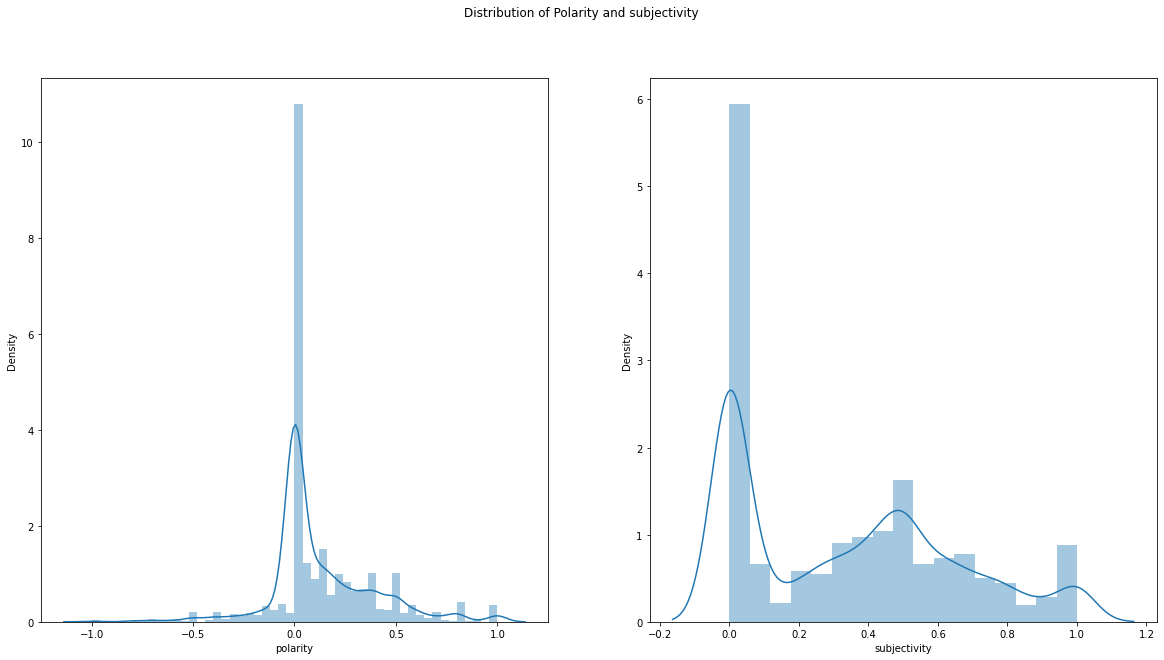

In [ ]:
# Visualization polarity and subjectivity
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
sns.distplot(text['polarity'])


plt.subplot(1,2,2)
sns.distplot(text['subjectivity'])
plt.suptitle('Distribution of Polarity and subjectivity')
plt.show()




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


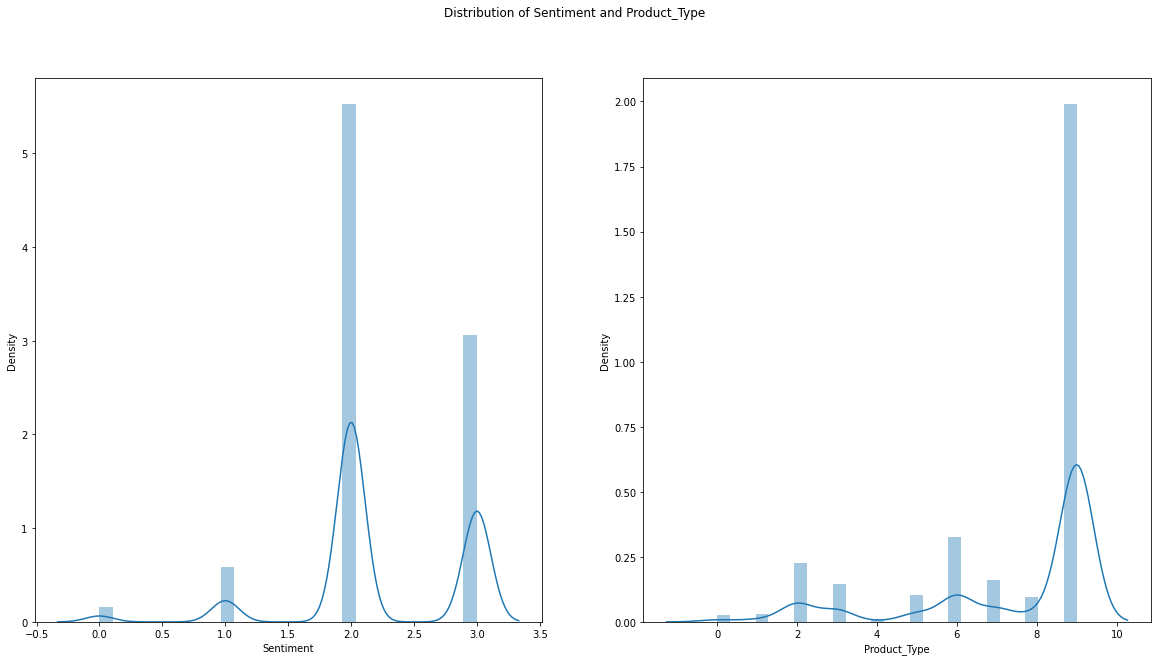

In [ ]:
# Product_Type and Sentiment

plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
sns.distplot(text['Sentiment'])


plt.subplot(1,2,2)
sns.distplot(text['Product_Type'])
plt.suptitle('Distribution of Sentiment and Product_Type')
plt.show()


In [ ]:
text.columns

Index(['Text_ID', 'Product_Description', 'Product_Type', 'Sentiment',
       'characters count', 'Words_count', 'polarity', 'subjectivity'],
      dtype='object')

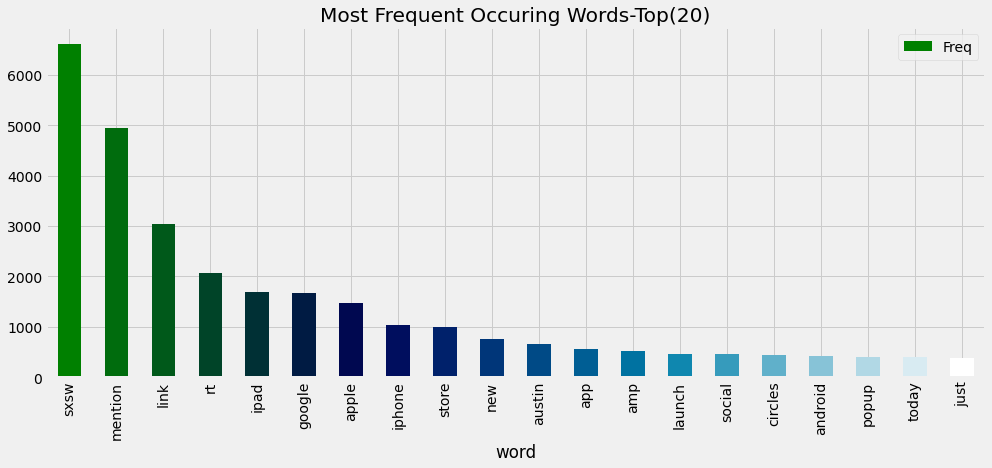

In [ ]:
## Visualizing the Most Frequent Words top(20)
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(stop_words ='english')
words =cv.fit_transform(text.Product_Description)
sum_words =words.sum(axis=0)

words_freq=[(word,sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1],reverse=True)
frequency= pd.DataFrame(words_freq, columns=['word','Freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0,1,20))
frequency.head(20).plot(x='word',y='Freq',kind='bar',figsize=(15,6),color=color)
plt.title('Most Frequent Occuring Words-Top(20)')
plt.show()

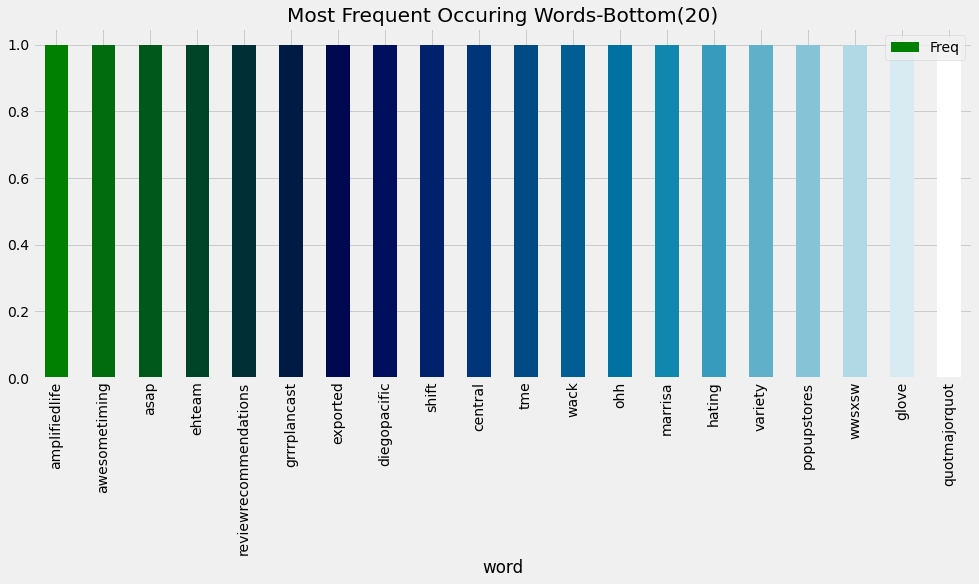

In [ ]:
## Visualizing the Most Frequent Words Bottom(20)
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

cv=CountVectorizer(stop_words ='english')
words =cv.fit_transform(text.Product_Description)
sum_words =words.sum(axis=0)

words_freq=[(word,sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1],reverse=True)
frequency= pd.DataFrame(words_freq, columns=['word','Freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0,1,20))
frequency.tail(20).plot(x='word',y='Freq',kind='bar',figsize=(15,6),color=color)
plt.title('Most Frequent Occuring Words-Bottom(20)')
plt.show()

In [ ]:
import nltk
import collections
# function for making ngrams
from nltk.util import ngrams

# Visualizing Bargrams
Text=str(text['Product_Description'])
tokenized = Text.split()
# get list of all Bigrams
esbigram=ngrams(tokenized,2)
# and get Frequancy of each bigram
Bigramfreq= collections.Counter(esbigram)

#calculate what are the most popular 10 bigram in dataset
Bigramfreq.most_common(10)


[(('rt', 'mention'), 4),
 (('0', 'the'), 1),
 (('the', 'web'), 1),
 (('web', 'designerâ\x89ã\x9bâªs'), 1),
 (('designerâ\x89ã\x9bâªs', 'guide'), 1),
 (('guide', 'to'), 1),
 (('to', 'ios'), 1),
 (('ios', 'and'), 1),
 (('and', 'andro...'), 1),
 (('andro...', '1'), 1)]

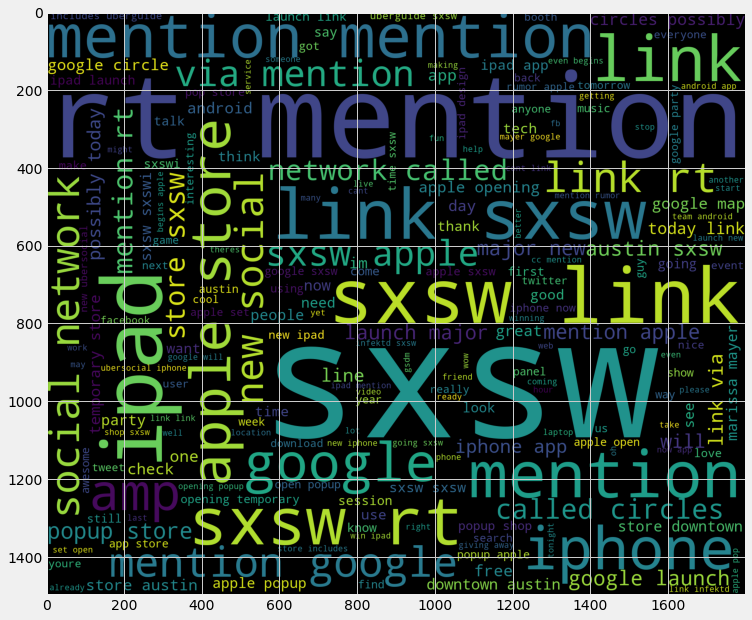

In [ ]:
#wordcloud for entire corpus

string_Total = " ".join(text["Product_Description"])
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

In [ ]:
# Read the data
# Extraction the feature

In [ ]:
Text= pd.read_csv('/content/sample_data/Train (1).csv', encoding='unicode_escape')
Text.drop(['Text_ID','Product_Type'],inplace=True,axis = 1)
Text.shape

(6364, 2)

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

clean_tx=[]
for i in range(0,6364):
  text=re.sub('[^a-zA-Z]','',Text['Product_Description'][i])
  text=text.lower()
  text=text.split()
  ps=PorterStemmer()
  text=[ps.stem(word)for word in text if not word in set (stopwords.words('english'))]
  review=''.join(text)
  clean_tx.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# feature extraction using Tfidf vector.
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer(max_features=3000)
x=tf.fit_transform(clean_tx).toarray()
y=Text.iloc[:,-1].values
print(x.shape)
print(y.shape)


(6364, 3000)
(6364,)


In [ ]:
# Split the data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
print(xtrain.shape)
print(xtest.shape)


(4454, 3000)
(1910, 3000)


# Build the Model 
 #naive bayes
 #SVM

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB 

ModelG=GaussianNB().fit(xtrain,ytrain)
Gpred=ModelG.predict(xtest)
print('Train Accu : ',ModelG.score(xtrain,ytrain))
print('Test Accu : ',ModelG.score(xtest,Gpred))


Train Accu :  0.4928154467894028
Test Accu :  1.0


In [ ]:
Model_m=MultinomialNB().fit(xtrain,ytrain)
pred=Model_m.predict(xtest)
print('Train Accu : ',Model_m.score(xtrain,ytrain))
print('Test Accu : ',Model_m.score(xtest,pred))


Train Accu :  0.7494387067804221
Test Accu :  1.0


In [43]:
from sklearn.svm import SVC
Model_svc=SVC().fit(xtrain,ytrain)
Pred=Model_svc.predict(xtest)
print('Train Accu : ',Model_svc.score(xtrain,ytrain))
print('Test Accu : ',Model_svc.score(xtest,Pred))


Train Accu :  0.7867085765603952
Test Accu :  1.0
